
[![AnalyticsDojo](https://github.com/rpi-techfundamentals/spring2019-materials/blob/master/fig/final-logo.png?raw=1)](http://rpi.analyticsdojo.com)
<center><h1>Time Series Analysis</h1></center>
<center><h3><a href = 'http://introml.analyticsdojo.com'>introml.analyticsdojo.com</a></h3></center>


# Time Series Analysis

In [1]:
import numpy as np
import pandas as pd
import os
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#!pip install yfinance

In [3]:
data =  yf.download(tickers="TSLA", start="2016-1-1",end="2021-12-31",progress=False)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,15.381333,15.425333,14.600000,14.894000,14.894000,102406500
2016-01-05,15.090667,15.126000,14.666667,14.895333,14.895333,47802000
2016-01-06,14.666667,14.670000,14.398667,14.602667,14.602667,56686500
2016-01-07,14.279333,14.562667,14.244667,14.376667,14.376667,53314500
2016-01-08,14.524000,14.696000,14.051333,14.066667,14.066667,54421500


Text(0.5, 1.0, 'Tesla')

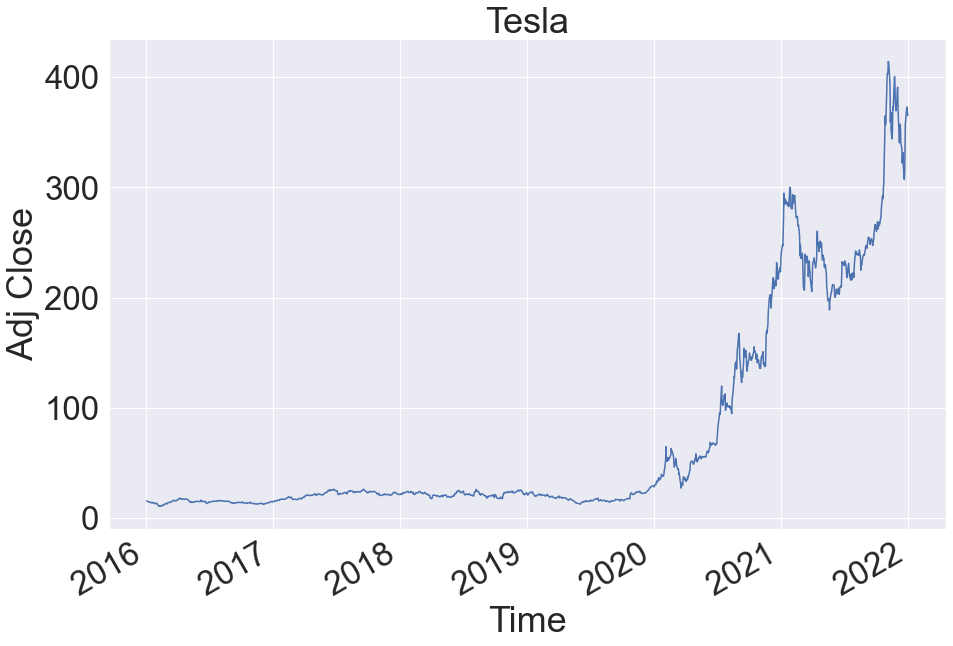

In [4]:
plt.rcParams["figure.figsize"] = (15,10)
sns.set(font_scale=3)
data['High'].plot()
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.title('Tesla')

In [15]:
#Select frequency based on no of observations that comprise a cycle in the dataset
ts_decompose_add = seasonal_decompose(x=data['High'], 
                                          model='additive', 
                                          freq=180) 
estimated_trend_add = ts_decompose_add.trend
estimated_seasonal_add = ts_decompose_add.seasonal
estimated_residual_add = ts_decompose_add.resid

<ipython-input-15-ada5a077c2aa>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  ts_decompose_add = seasonal_decompose(x=data['High'],


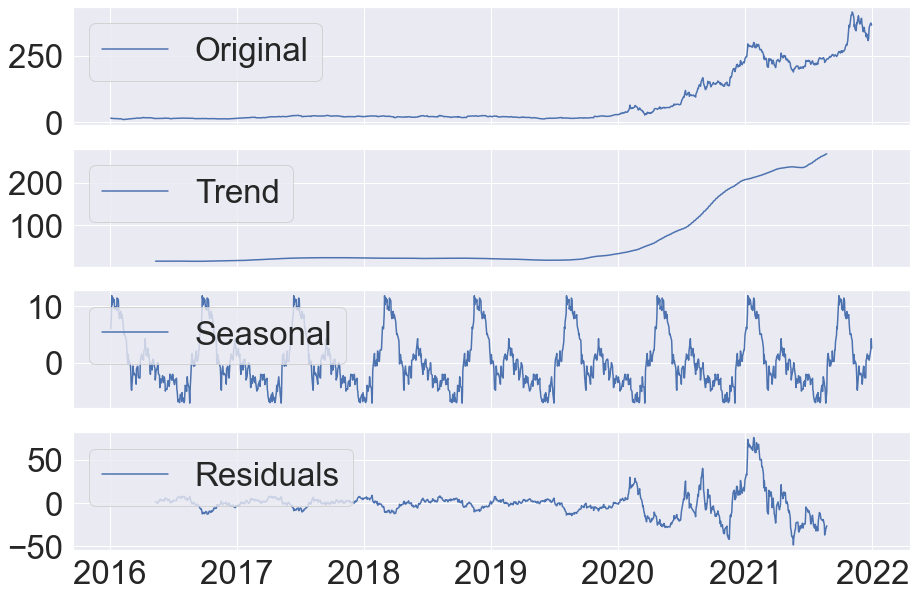

In [16]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
# fig.set_figheight(10)
# fig.set_figwidth(15)

axes[0].plot(data['High'], label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend_add, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal_add, label='Seasonal')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual_add, label='Residuals')
axes[3].legend(loc='upper left');